In [1]:

import pandas as pd
import numpy as np

In [2]:
##1 3)
def ff_nn_ReLu(W,V,c,b,X):

    h=np.vectorize(relu)(np.dot(X,W).__add__(b))
    output=np.dot(h,V.T)+c
    y=sigmoid(output)
    return y

In [3]:
def sigmoid(m):
    return (1/(1+np.exp(-m)))

In [4]:
def relu(m):
    #return max(m,0)
    return np.maximum(0,m)


In [5]:
##1.4)
##compute the question 4
W=np.array(([1,-1,0],[0,0,0.5]))
b=np.array([0,0,1])
V=np.array([1,0,-1])
X=np.array(([1,-1],[0,-1],[0,1]))
c=1

In [6]:
y=[]
for i in range(len(X)):
    yi=ff_nn_ReLu(W,V,c,b,X[i])
    y.append(yi)
print(y)    

[0.8175744761936437, 0.6224593312018546, 0.3775406687981454]


#####
So the  the class probabilities associated with the forward pass of each
sample is 0.8175744761936437, 0.6224593312018546, 0.3775406687981454

In [7]:
###2

##1)
d(f(x,y))/d(x)=1-3x^2+200(y^2-x), 
##
d(f(x,y))/d(y)=200(y^2-x)*2y

In [8]:
##2)
%matplotlib inline

import matplotlib.pyplot as plt
xlist = np.linspace(-3, 3,10)
ylist = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(xlist, ylist)

Z = (1-X**3)+100*(Y**2-X)**2

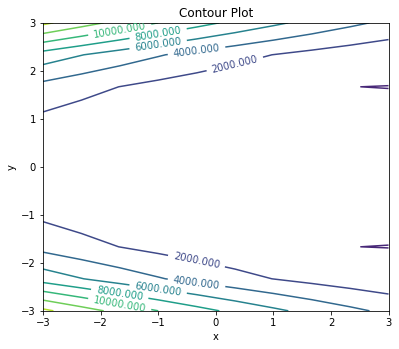

In [9]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 


#Z = np.sqrt(X**2 + Y**2)
cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [10]:
##2. 3)

def grad_descent(point, iterations, learning_rate=0.1):

    trajectory = [point]
    
    for i in range(iterations):
        x,y=point
        x = x- learning_rate * (200*x - 3*x**2 - 200*y**2)
        y = y- learning_rate * 400*y*(-x+y**2)
        point=np.array([x, y])
        #grad = grad_f(point)
        #point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

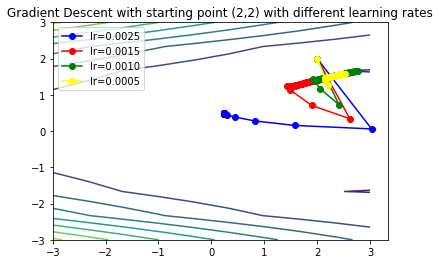

In [11]:

np.random.seed(10)
starting_point=[2,2]
iterations=50
traj_1 = grad_descent(starting_point, iterations, learning_rate=0.0025)
traj_2 = grad_descent(starting_point, iterations, learning_rate=0.0015)
traj_3 = grad_descent(starting_point, iterations, learning_rate=0.0010)
traj_4 = grad_descent(starting_point, iterations, learning_rate=0.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x_1 = traj_1[:,0]
y_1 = traj_1[:,1]

x_2 = traj_2[:,0]
y_2 = traj_2[:,1]

x_3 = traj_3[:,0]
y_3 = traj_3[:,1]

x_4 = traj_4[:,0]
y_4 = traj_4[:,1]

plt.plot(x_1, y_1, '-o', color='blue', label='lr=0.0025')
plt.plot(x_2, y_2, '-o', color='red', label='lr=0.0015')
plt.plot(x_3, y_3, '-o', color='green', label='lr=0.0010')
plt.plot(x_4, y_4, '-o', color='yellow', label='lr=0.0005')
plt.title('Gradient Descent with starting point (2,2) with different learning rates')
plt.legend()
plt.show()

In [12]:
##2. 4)
def grad_descent_with_momentum(point, iterations,alpha,e):

    trajectory = [point]
    stepx=0
    stepy=0
    for i in range(iterations):
        x,y=point
        
        stepx=alpha*stepx+e*(200*x - 3*x**2 - 200*y**2)
        stepy=alpha*stepy+e*(400*y*(-x+y**2))
        x = x-stepx
        y = y-stepy
        point=np.array([x, y])
        #grad = grad_f(point)
        #point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

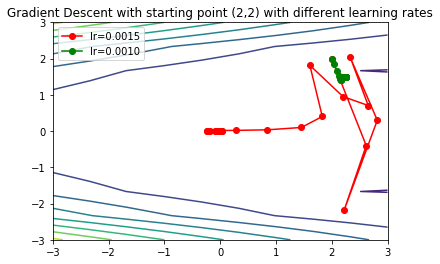

In [13]:
np.random.seed(10)
starting_point=[2,2]
iterations=50
#learning_rate1=0.00025
learning_rate2=0.0015
learning_rate3=0.0001
#learning_rate4=0.0005
alpha=0.5
#traj_1 = grad_descent_with_momentum(starting_point, iterations, alpha,learning_rate1)
traj_2 = grad_descent_with_momentum(starting_point, iterations,alpha, learning_rate2)
traj_3 = grad_descent_with_momentum(starting_point, iterations,alpha, learning_rate3)
#traj_4 = grad_descent_with_momentum(starting_point, iterations,alpha, learning_rate4)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
#x_1 = traj_1[:,0]
#y_1 = traj_1[:,1]

x_2 = traj_2[:,0]
y_2 = traj_2[:,1]

x_3 = traj_3[:,0]
y_3 = traj_3[:,1]

#x_4 = traj_4[:,0]
#y_4 = traj_4[:,1]

#plt.plot(x_1, y_1, '-o', color='blue', label='lr=0.0025')
plt.plot(x_2, y_2, '-o', color='red', label='lr=0.0015')
plt.plot(x_3, y_3, '-o', color='green', label='lr=0.0010')
#plt.plot(x_4, y_4, '-o', color='yellow', label='lr=0.0005')
plt.title('Gradient Descent with starting point (2,2) with different learning rates')
plt.legend()
plt.show()

In [14]:
##3. 2)
def cross_entropy_loss(y, y_hat):
    # Binary cross entropy
    total = y * np.log(y_hat)+(1-y)*np.log(1-y_hat)
    return -total.sum()

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x>0, 1, 0)



In [15]:
W = np.random.randn(6).reshape(2,3)
V = np.random.randn(3).reshape(3,1)
b = np.random.randn(3).reshape(1,3)
c = np.random.randn(1)

In [30]:

def cross_entropy_loss(y, y_hat):

    total = y * np.log(y_hat)+(1-y)*np.log(1-y_hat)
    return -total.sum()

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def parameters():
    W = np.random.randn(6).reshape(2,3)
    V = np.random.randn(3).reshape(3,1)
    b = np.random.randn(3).reshape(1,3)
    c = np.random.randn(1)
    return (W, V, b, c)

In [31]:
def grad_f(x, y, params):

    W, V, b, c = params
    a = np.dot(x, W) + b
    h = relu(a)
    y_hat = sigmoid(np.dot(h, V) +c)
    
    dL_dc = (y_hat-y).sum()
    dL_dv = h.T.dot(y_hat-y)
    dL_db =((y_hat-y).dot(V.T)*relu_derivative(a)).sum(axis=0)
    dL_dw = x.T.dot((y_hat-y).dot(V.T)*relu_derivative(a))
    return (dL_dw, dL_dv, dL_db, dL_dc)

In [32]:
x = np.random.randn(1000).reshape((500,2))
y = np.random.randn(500).reshape((500,1))
grad_f(x, y, randomized_weights_bias())

(array([[ -3.80019808, -75.78036834,  -9.24243811],
        [  0.81963061,  71.35948758,  -9.29835188]]), array([[ 2.2269235 ],
        [65.87172144],
        [89.80195936]]), array([  -1.90702994,   87.65031649, -105.50341814]), 172.58954951574833)

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


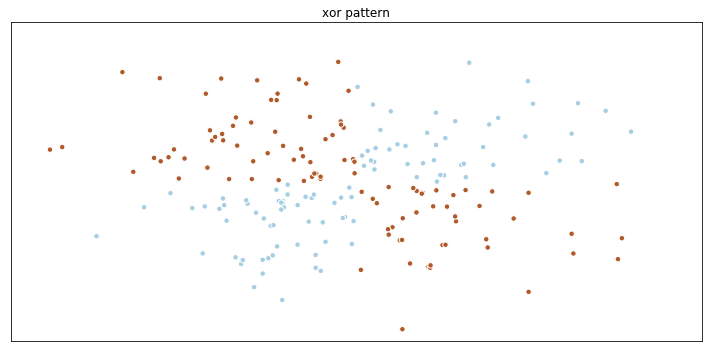

In [33]:
##3)
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct


xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
plt.figure(figsize=(10, 5))
kernels = [1.0 * RBF(length_scale=1.0), 1.0 * DotProduct(sigma_0=1.0)**2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                edgecolors=(1, 1, 1))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.title("xor pattern")

plt.tight_layout()
plt.show()

In [34]:

x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros((500,1))
y[np.logical_and(x[:,0]>0, x[:,1]>0)] = 1
y[np.logical_and(x[:,0]<0, x[:,1]<0)] = 1

In [35]:
##4

def forward(x, paramter):
    W, V, b, c = paramter
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c) 
    return y

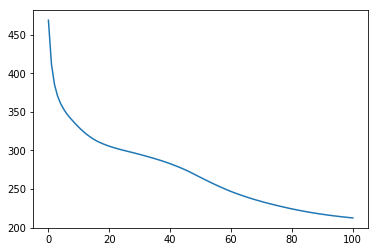

In [41]:



def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=1e-1):

    point = starting_point
    trajectory = [point]
    losses = [cross_entropy_loss(y, forward(x, point))]
    
    for i in range(iterations):
        grads = grad_f(x, y, point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(cross_entropy_loss(y, forward(x, point)))
    return (np.array(trajectory), losses)

traj, losses = grad_descent(x, y, starting_point=parameters(), iterations=100, learning_rate=1e-3)
plt.plot(losses)

In [42]:
##5.
def grad_descent_with_momentum(x, y, starting_point, iterations=10, epsilon=1e-2, alpha=0.001):
    point = starting_point 
    trajectory = [point]
    losses = [cross_entropy_loss(y, forward(x, point))]
    vs = np.zeros(len(starting_point))
    
    for i in range(iterations):
        grads =grad_f(x, y, point)
        update = []  
        for (newpara, grad, v) in zip(point, grads, vs):
            update.append(newpara - epsilon*grad-alpha*v)
        
        vs = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(cross_entropy_loss(y, forward(x, point)))
        
    return (np.array(trajectory), losses)

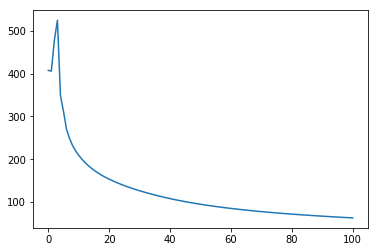

In [43]:

traj, losses = grad_descent_with_momentum(x, y, starting_point=parameters(), iterations=100, epsilon=3e-3, alpha=0.00001)
plt.plot(losses)


from the two plots above, we can tell momentum function can get converage faster than normal gradient descent.

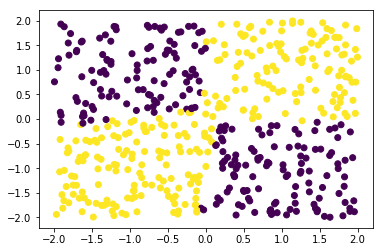

In [44]:
##6)
W,V,b,c=traj[-1]
point=(W, V, b, c)
y_pred =  forward(x, point)
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_pred[:,0])

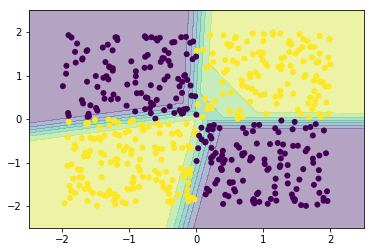

In [45]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
labels =  forward(np.c_[xx.ravel(), yy.ravel()], point)
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()